In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

imports

In [5]:

import matplotlib.pyplot as plt

def my_sinc(x):
    if(x==0):
        return 1
    return math.sin(x)/x

part 1 this function gets x and returns sin(x)/x and if x is equal to 0 it returns 1

In [7]:

my_sinc_vectorized = np.vectorize(my_sinc)

x_100 = np.linspace(-15, 15, 100)
x_300 = np.linspace(-15, 15, 300)
x_1000 = np.linspace(-15, 15, 1000)

y_100 = my_sinc_vectorized(x_100)
y_300 = my_sinc_vectorized(x_300)
y_1000 = my_sinc_vectorized(x_1000)


part 2 yeknavakht sample with 100,300,1000 points between -15 and 15

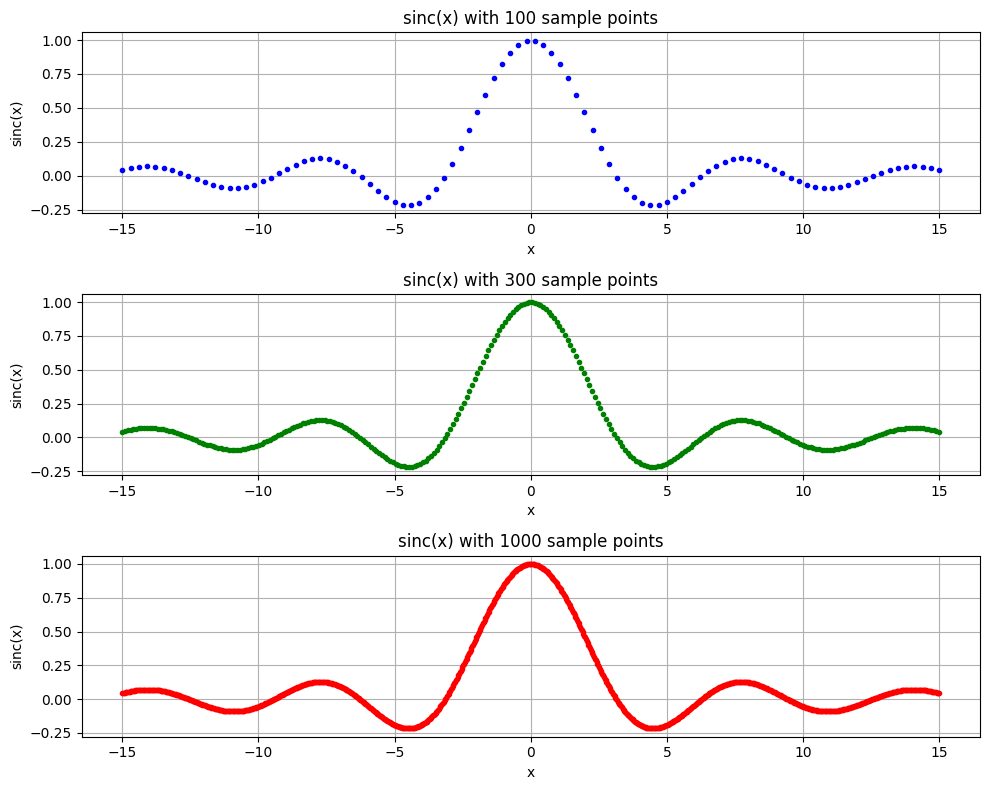

In [9]:

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(x_100, y_100, '.', color='blue')
plt.title('sinc(x) with 100 sample points')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x_300, y_300, '.', color='green')
plt.title('sinc(x) with 300 sample points')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x_1000, y_1000, '.', color='red')
plt.title('sinc(x) with 1000 sample points')
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

what part 2 wants is shown

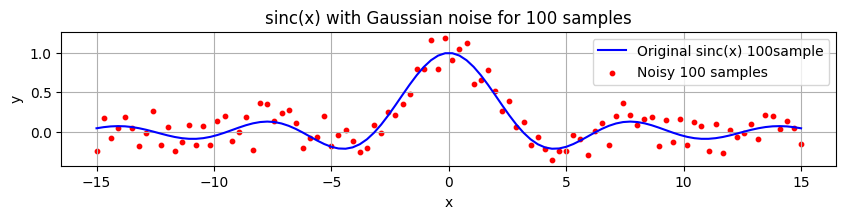

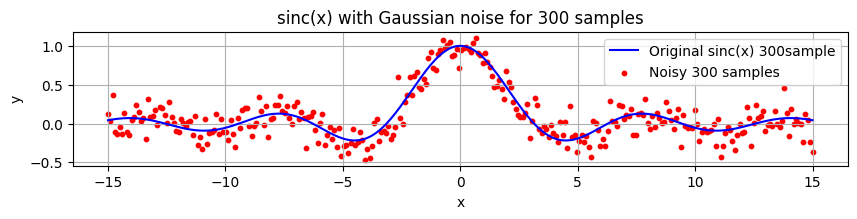

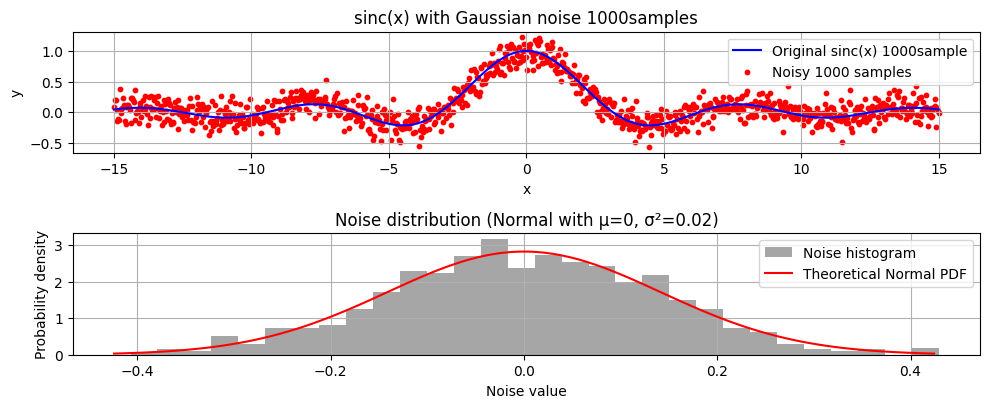

In [18]:

def add_normal_noise(y, mean=0, variance=0.02):
    noise = np.random.normal(mean, math.sqrt(variance), size=len(y))
    y_noisy = y + noise
    return y_noisy, noise

y100noisy, noise = add_normal_noise(y_100, mean=0, variance=0.02)

y300noisy, noise = add_normal_noise(y_300, mean=0, variance=0.02)

y1000noisy, noise = add_normal_noise(y_1000, mean=0, variance=0.02)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(x_100, y_100, label='Original sinc(x) 100sample', color='blue')
plt.scatter(x_100, y100noisy, label='Noisy 100 samples', color='red', s=10)
plt.title('sinc(x) with Gaussian noise for 100 samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(x_300, y_300, label='Original sinc(x) 300sample', color='blue')
plt.scatter(x_300, y300noisy, label='Noisy 300 samples', color='red', s=10)
plt.title('sinc(x) with Gaussian noise for 300 samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 3)
plt.plot(x_1000, y_1000, label='Original sinc(x) 1000sample', color='blue')
plt.scatter(x_1000, y1000noisy, label='Noisy 1000 samples', color='red', s=10)
plt.title('sinc(x) with Gaussian noise 1000samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.hist(noise, bins=30, density=True, color='gray', alpha=0.7, label='Noise histogram')

mu, sigma = 0, math.sqrt(0.02)
x_norm = np.linspace(-3*sigma, 3*sigma, 100)
plt.plot(x_norm, (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-x_norm**2 / (2*sigma**2)),
         color='red', label='Theoretical Normal PDF')

plt.title('Noise distribution (Normal with μ=0, σ²=0.02)')
plt.xlabel('Noise value')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


part 3 now we have noisy and original y, noise mean is 0 and noise variance is 0.02

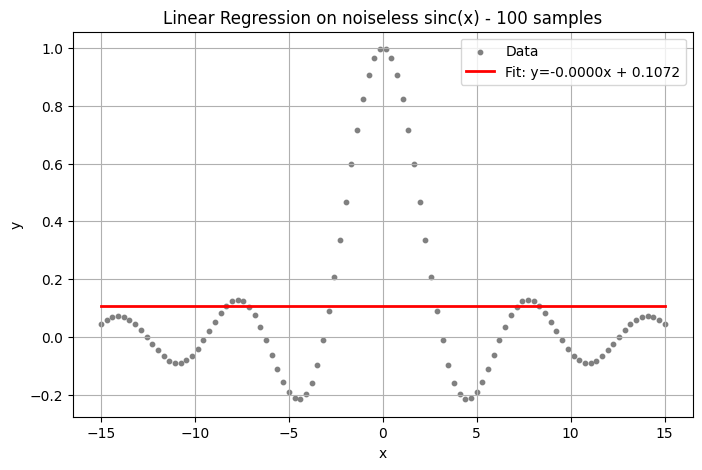

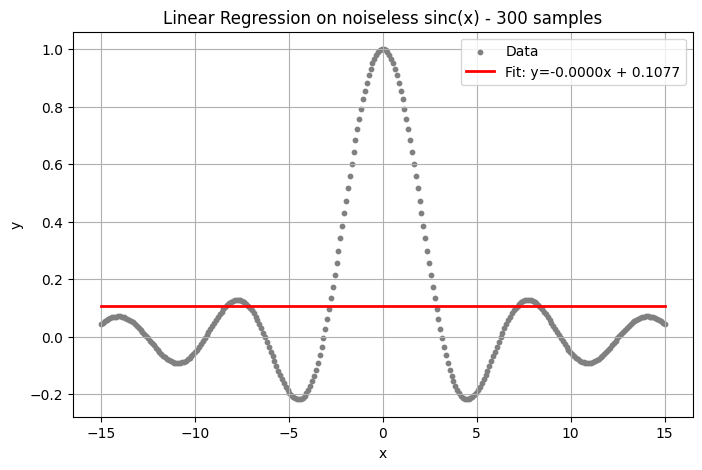

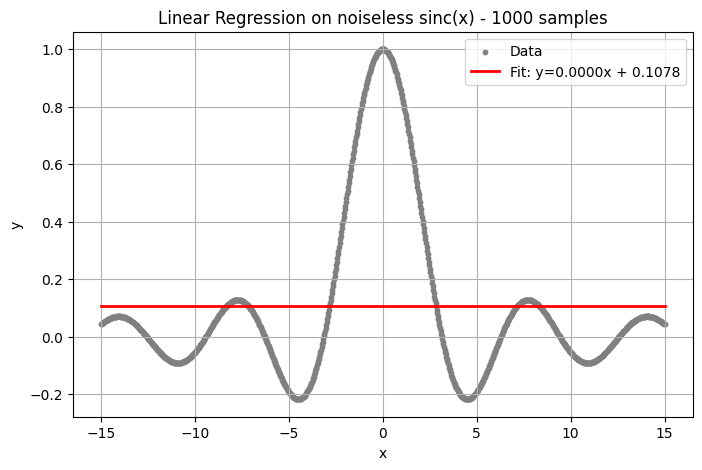

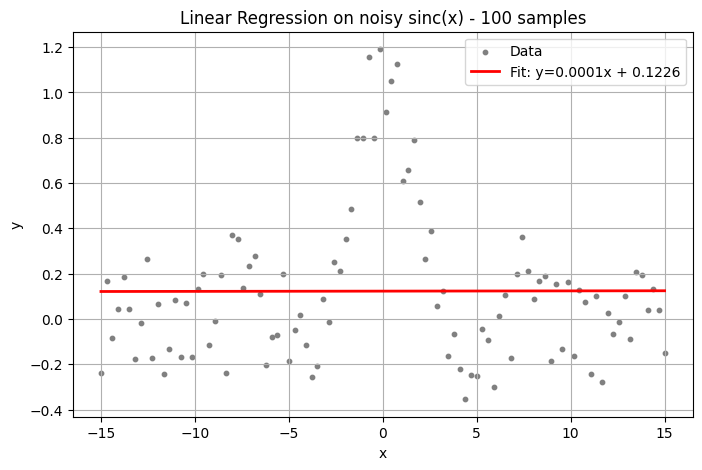

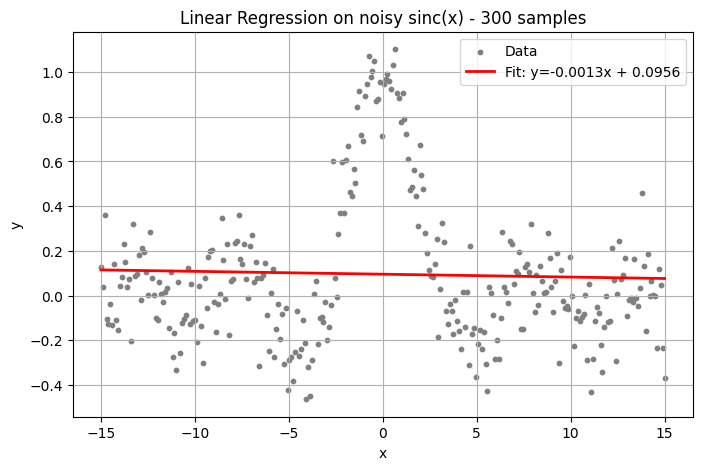

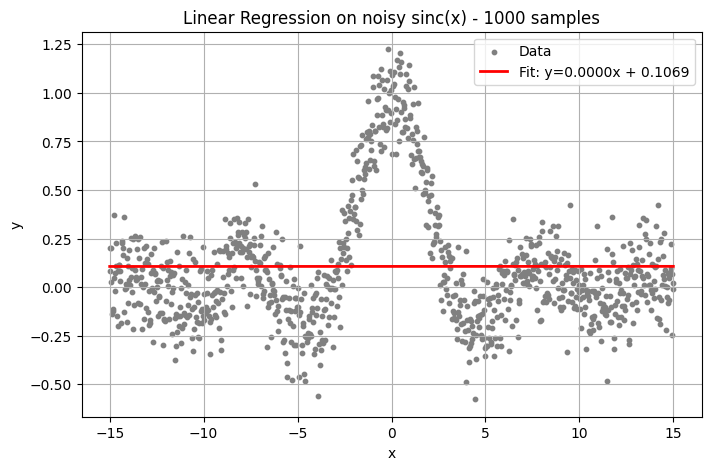

(np.float64(2.013792837291537e-05), np.float64(0.10691287406665687))

In [20]:
def linear_regression_fit(x, y, title):
    X = x.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='gray', s=10, label='Data')
    plt.plot(x, y_pred, color='red', linewidth=2, label=f'Fit: y={slope:.4f}x + {intercept:.4f}')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return slope, intercept

linear_regression_fit(x_100, y_100, 'Linear Regression on noiseless sinc(x) - 100 samples')
linear_regression_fit(x_300, y_300, 'Linear Regression on noiseless sinc(x) - 300 samples')
linear_regression_fit(x_1000, y_1000, 'Linear Regression on noiseless sinc(x) - 1000 samples')

linear_regression_fit(x_100, y100noisy, 'Linear Regression on noisy sinc(x) - 100 samples')
linear_regression_fit(x_300, y300noisy, 'Linear Regression on noisy sinc(x) - 300 samples')
linear_regression_fit(x_1000, y1000noisy, 'Linear Regression on noisy sinc(x) - 1000 samples')

part 4.1 linear regression

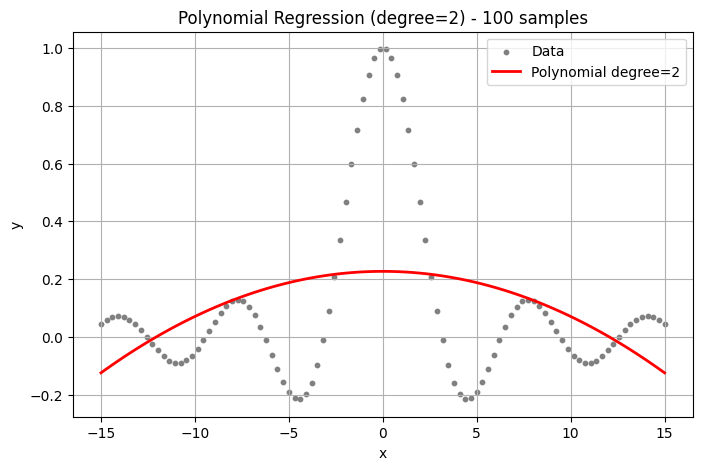

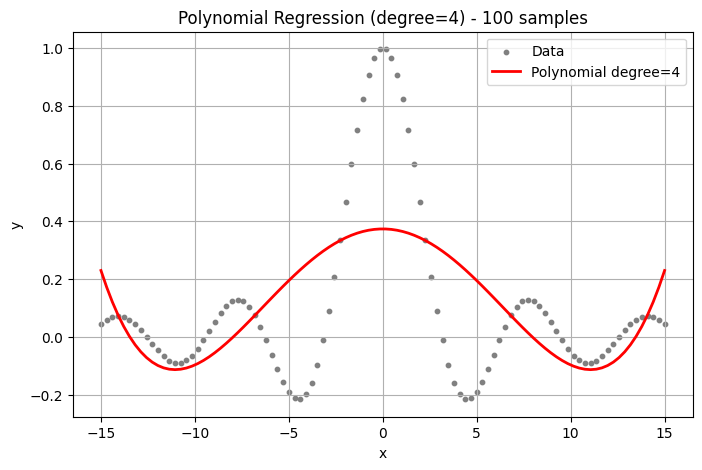

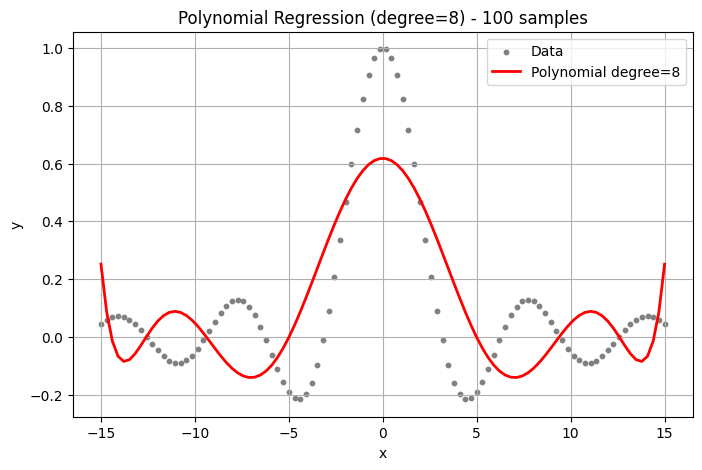

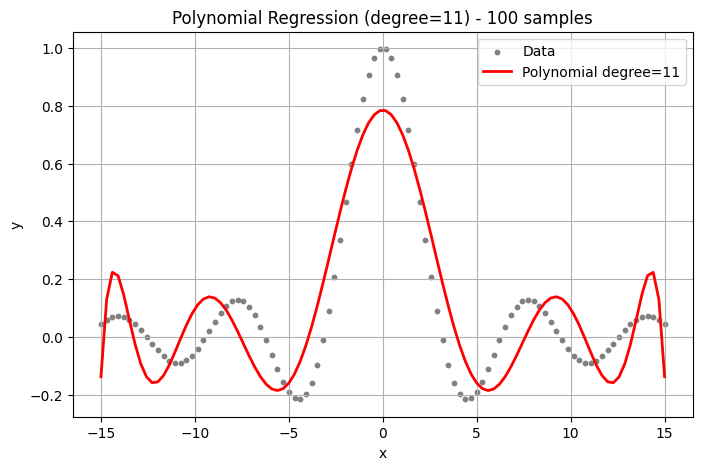

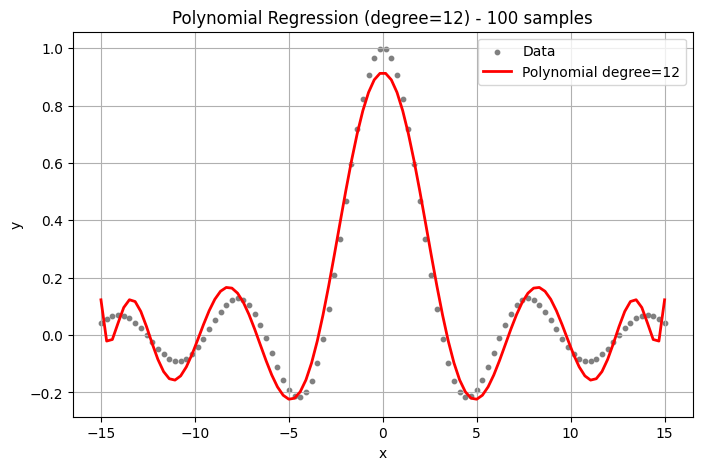

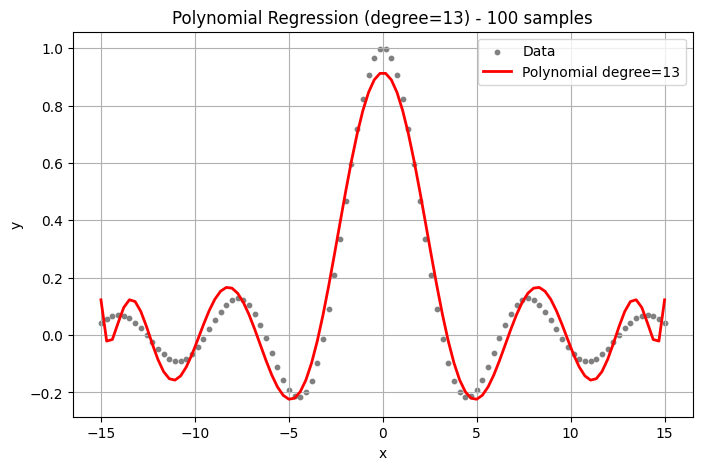

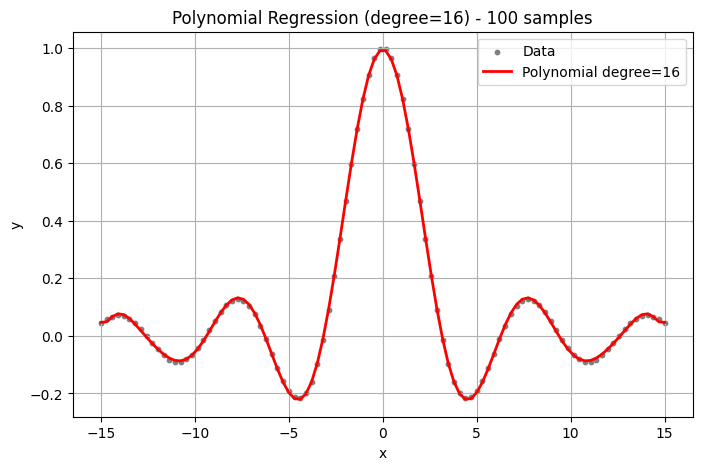

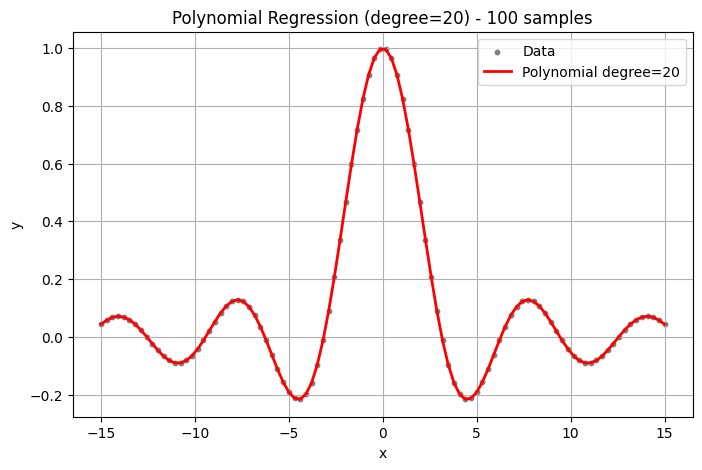

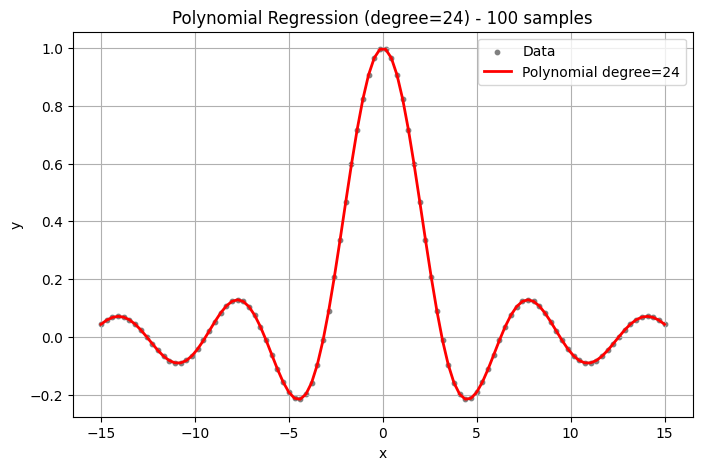

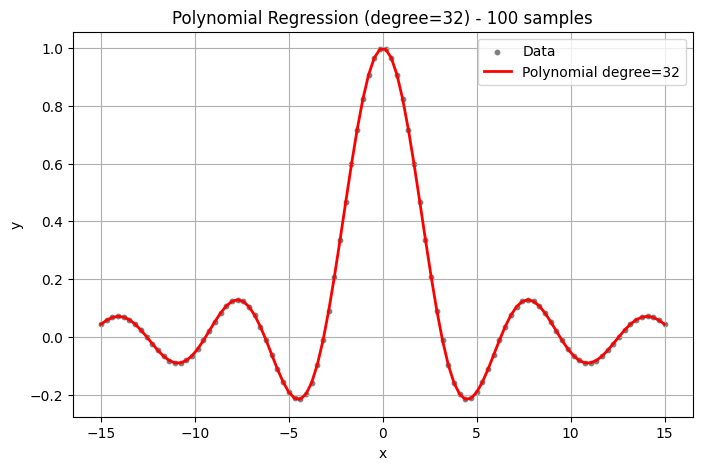

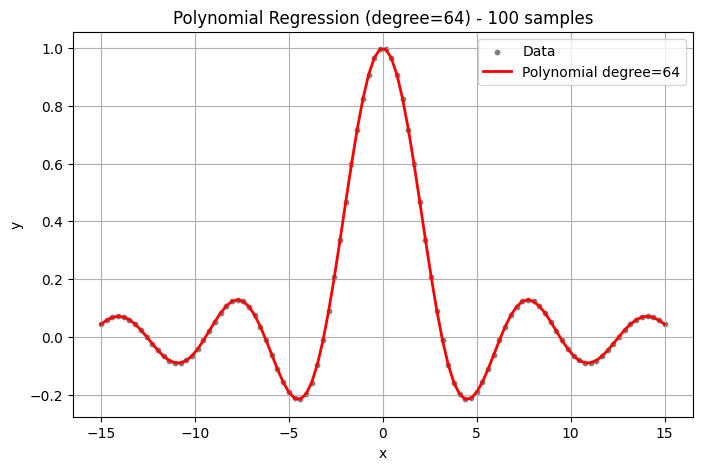

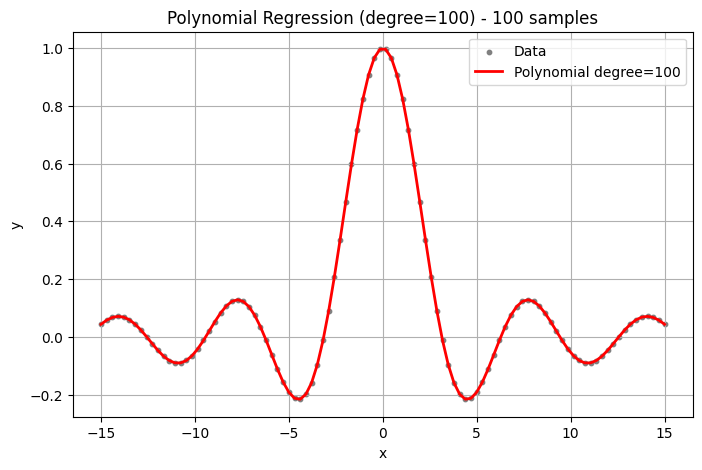

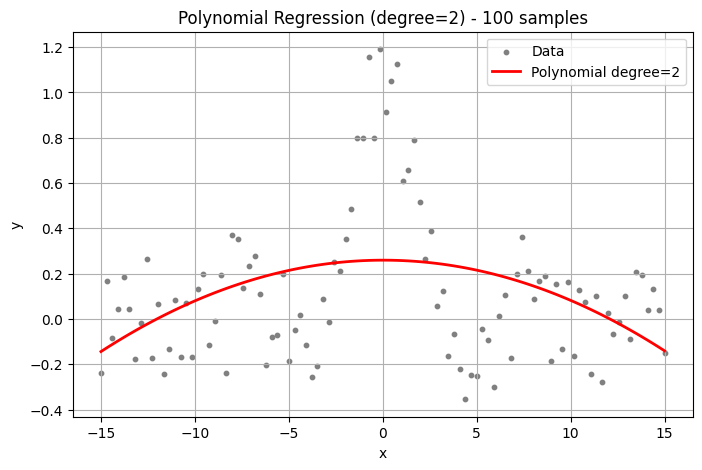

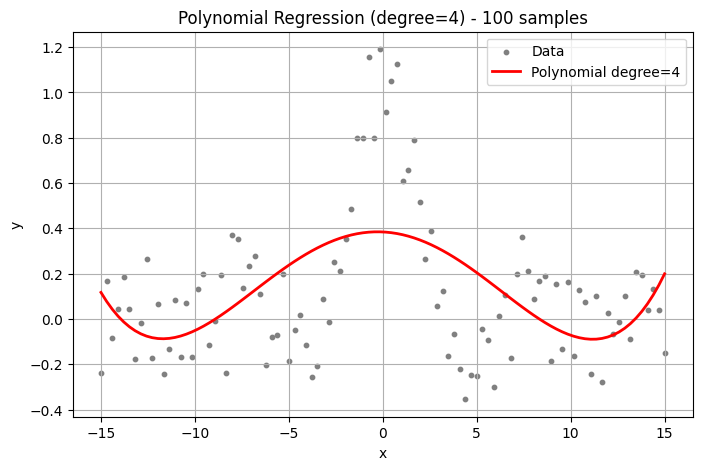

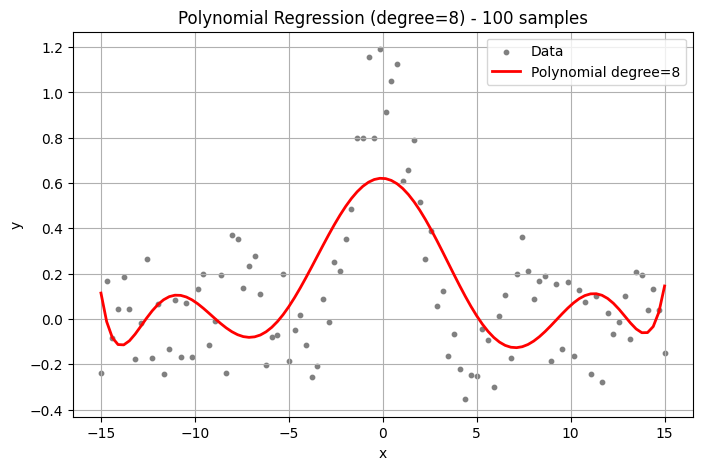

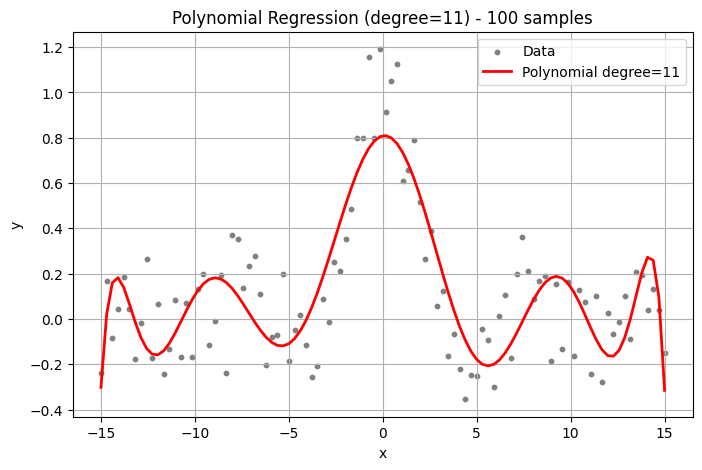

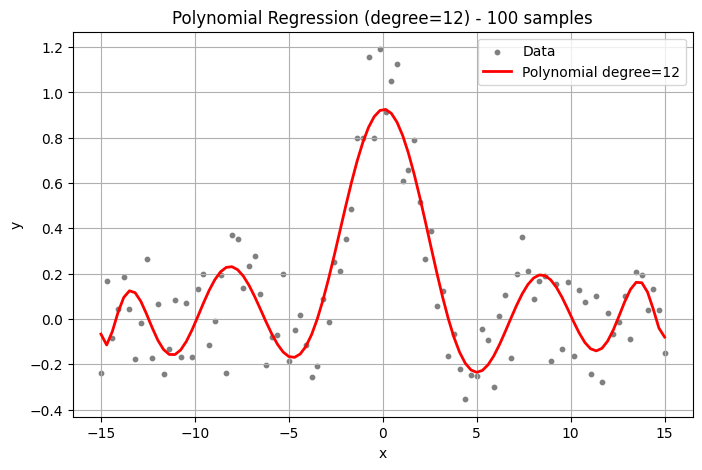

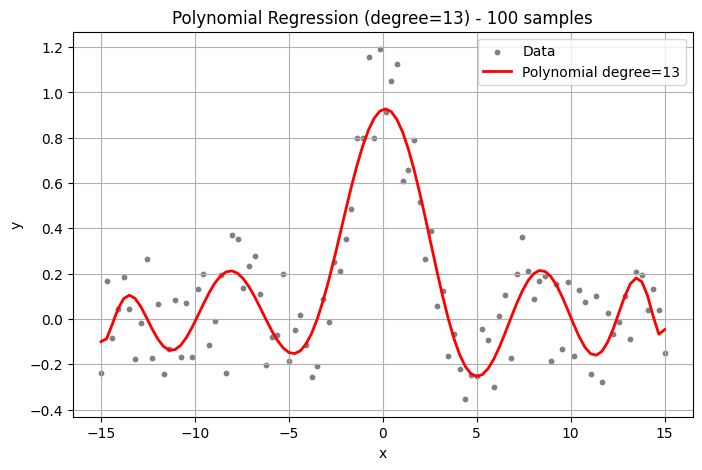

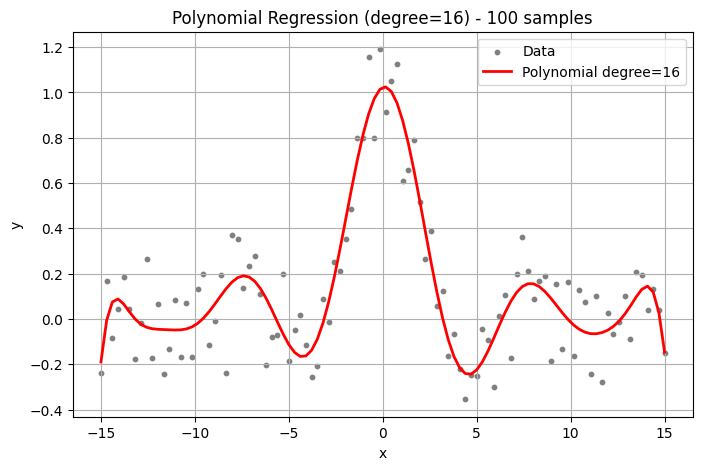

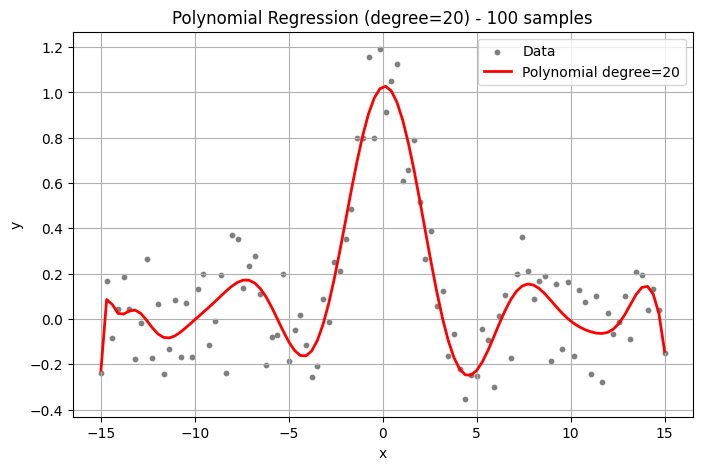

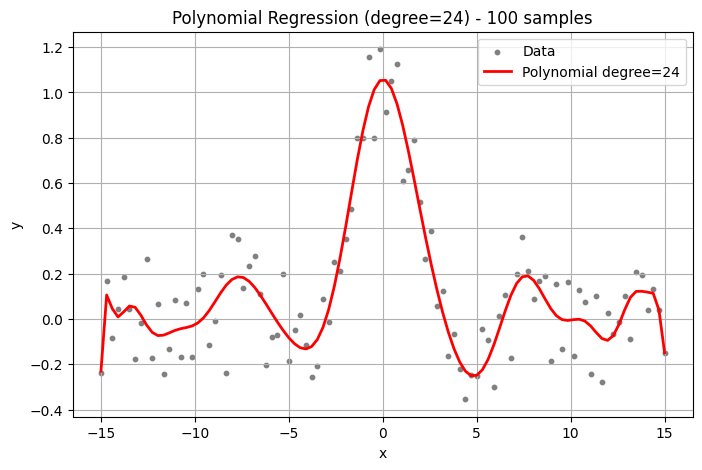

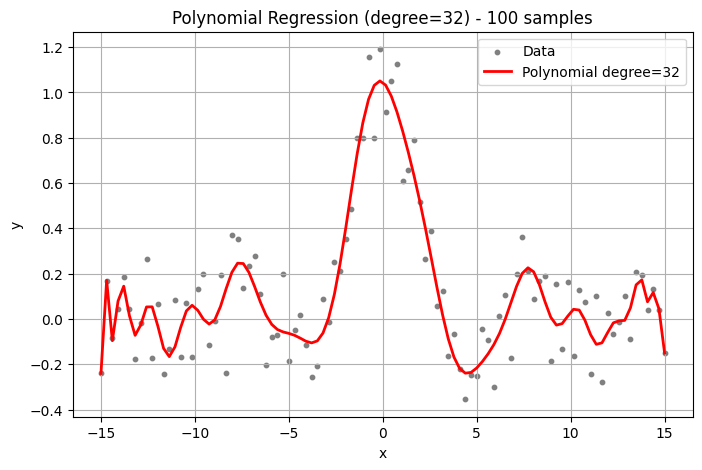

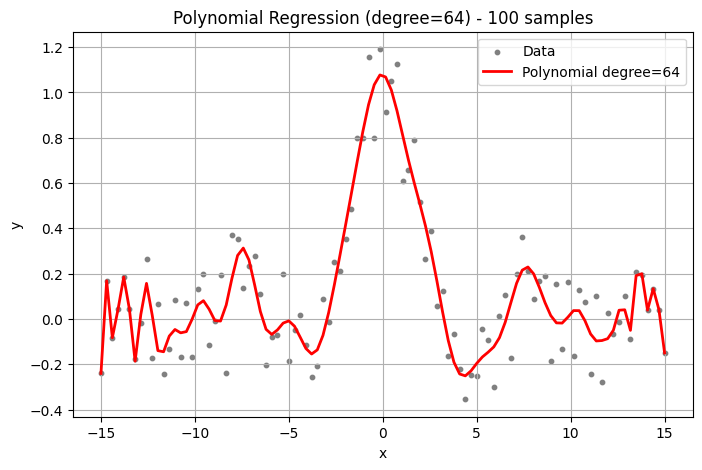

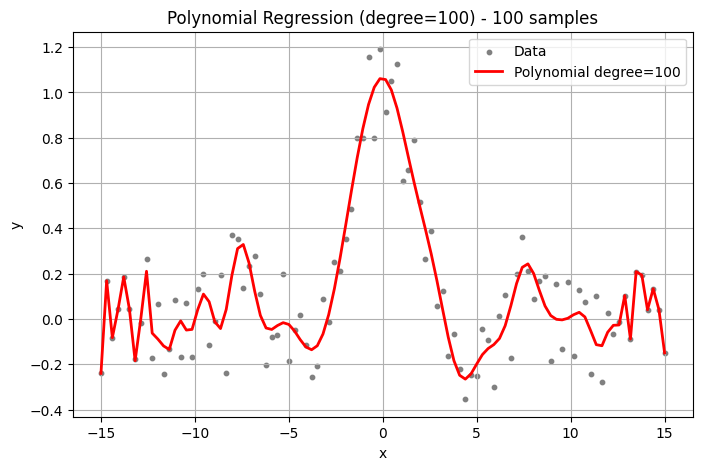

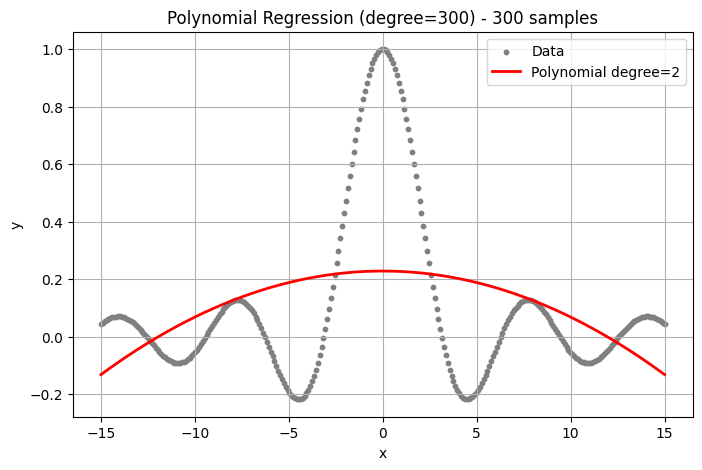

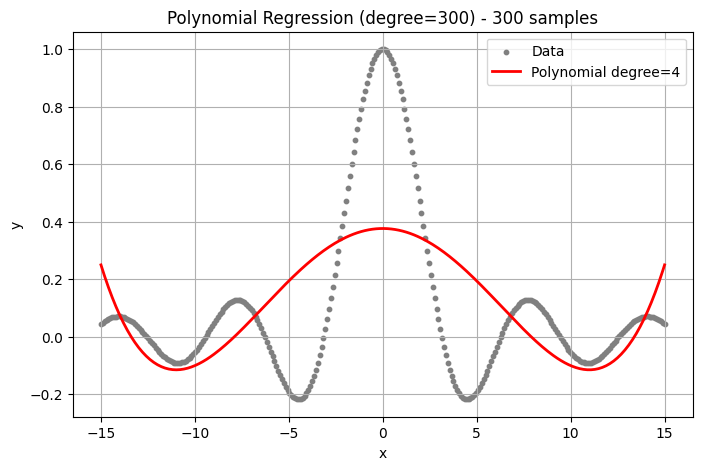

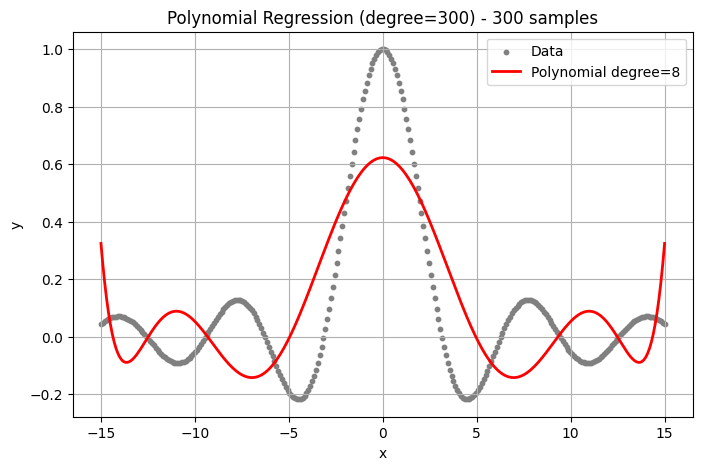

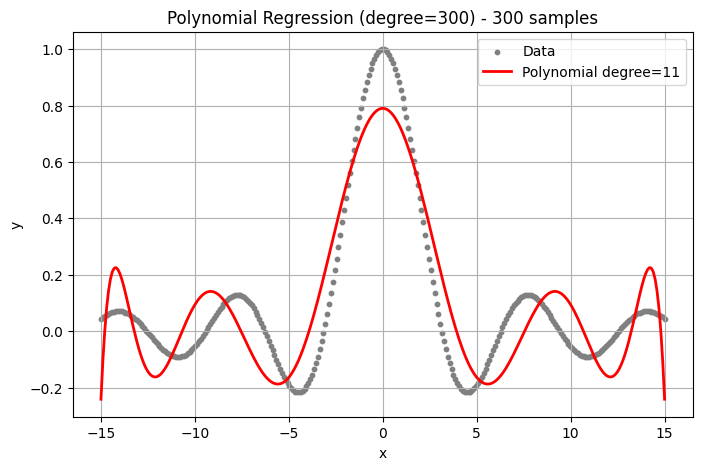

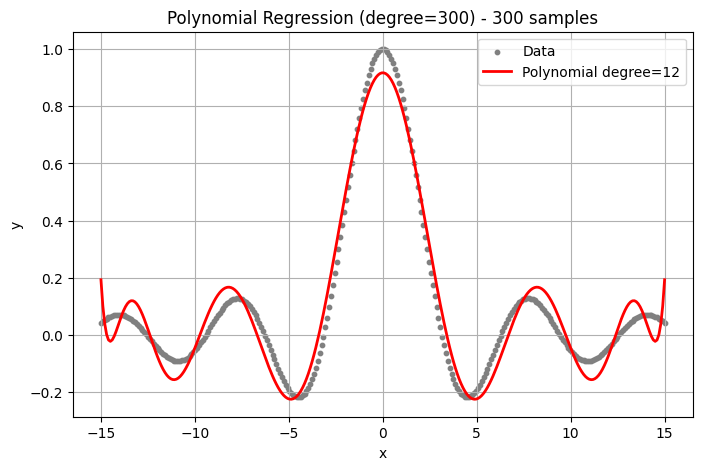

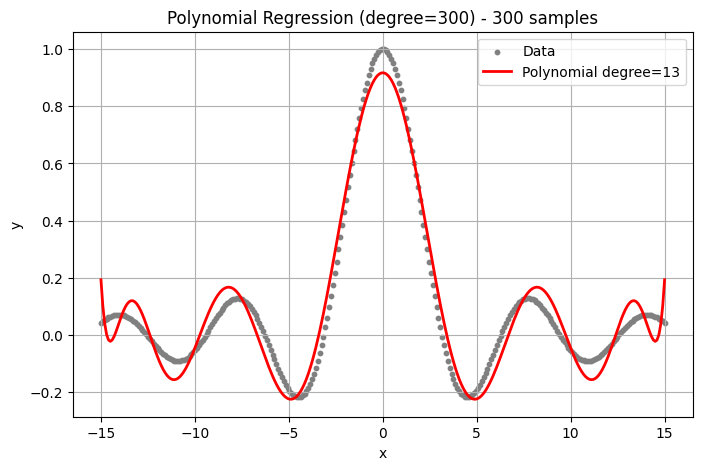

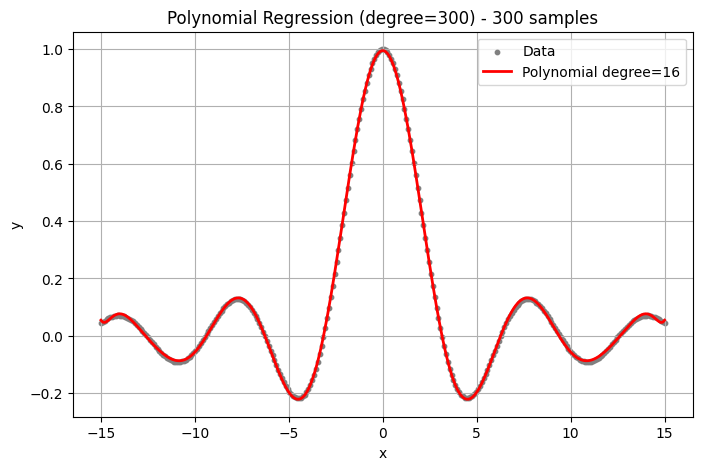

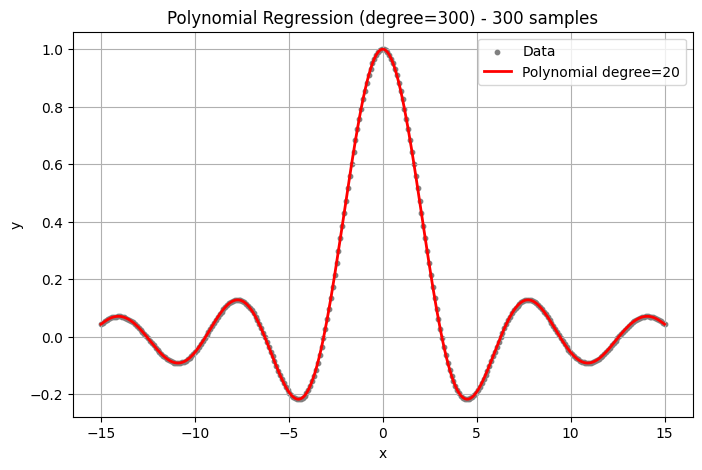

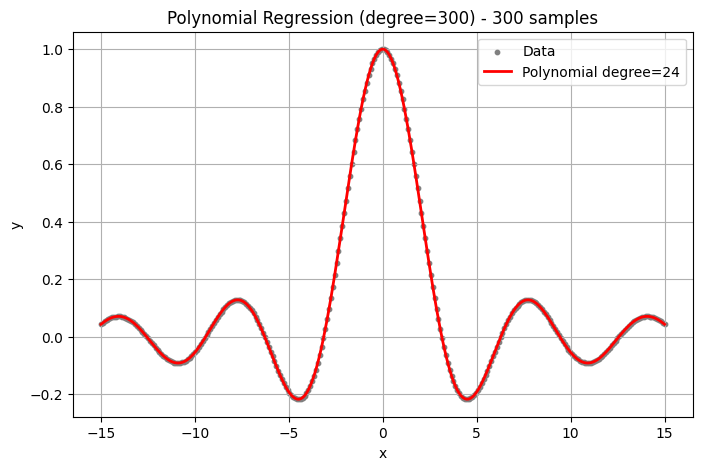

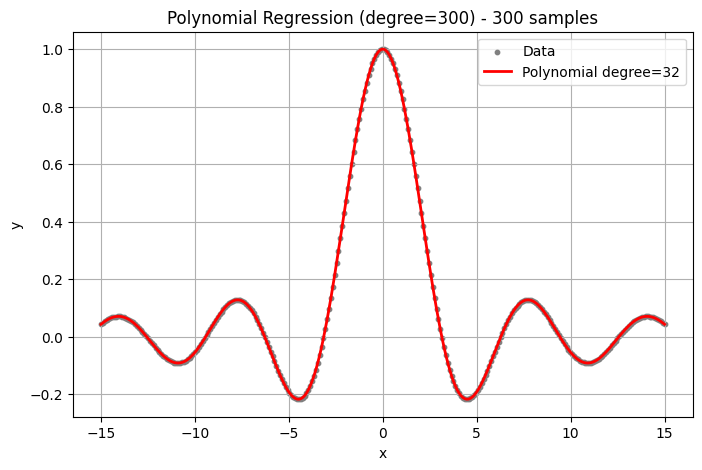

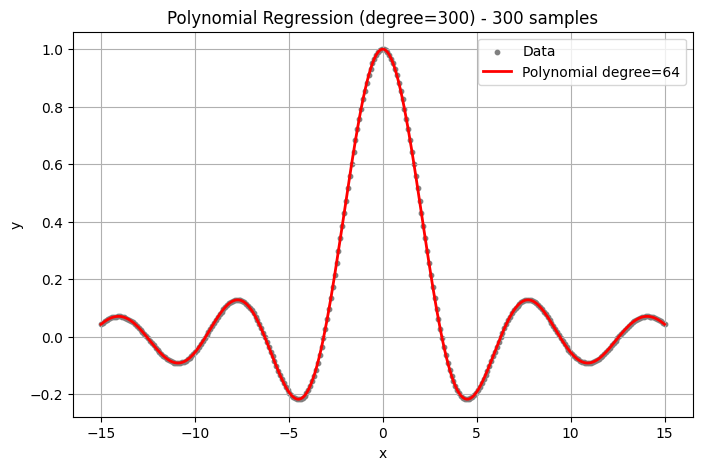

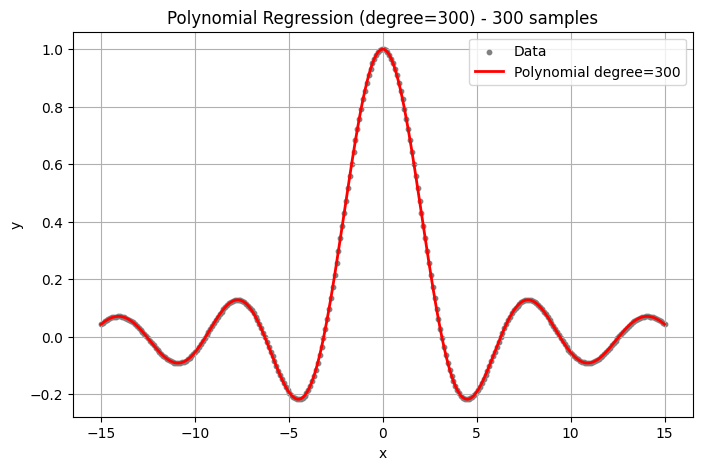

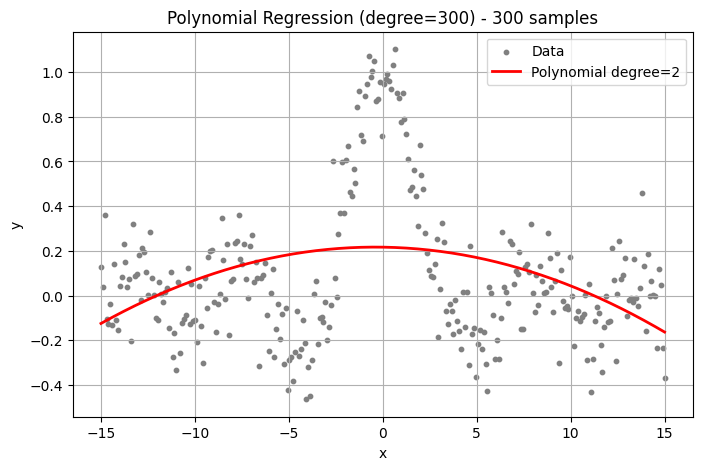

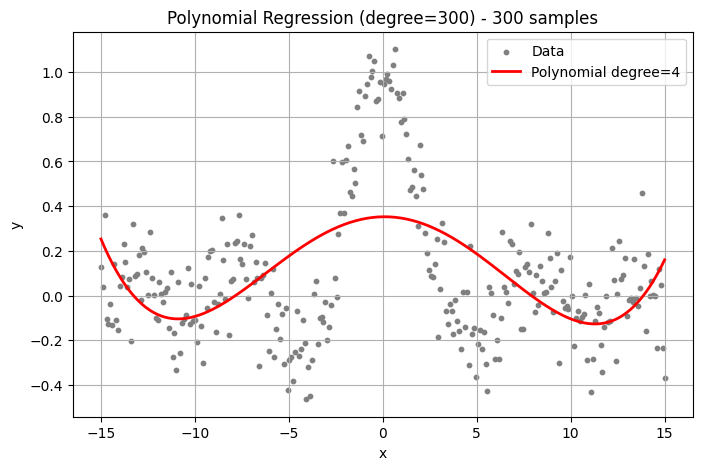

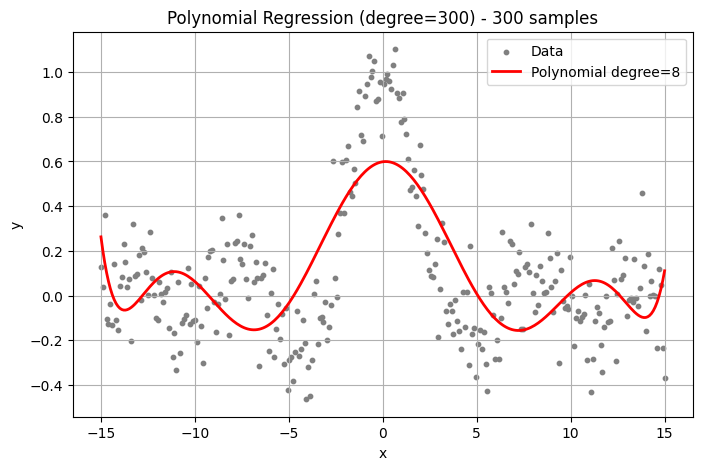

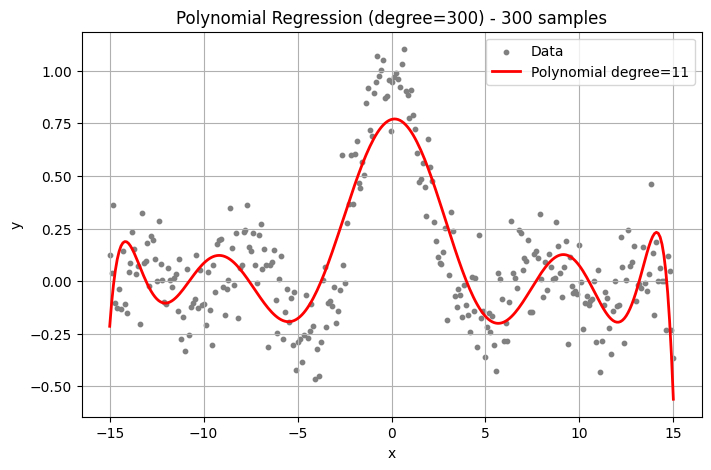

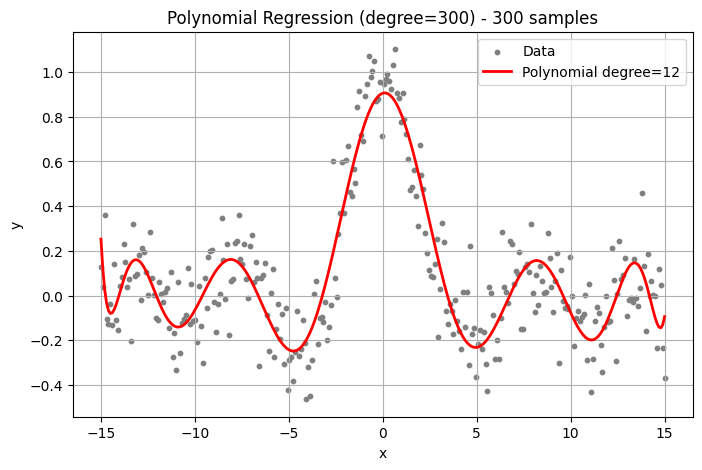

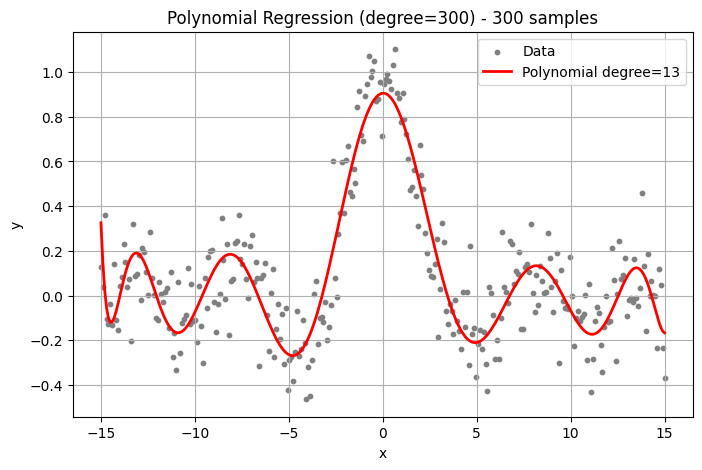

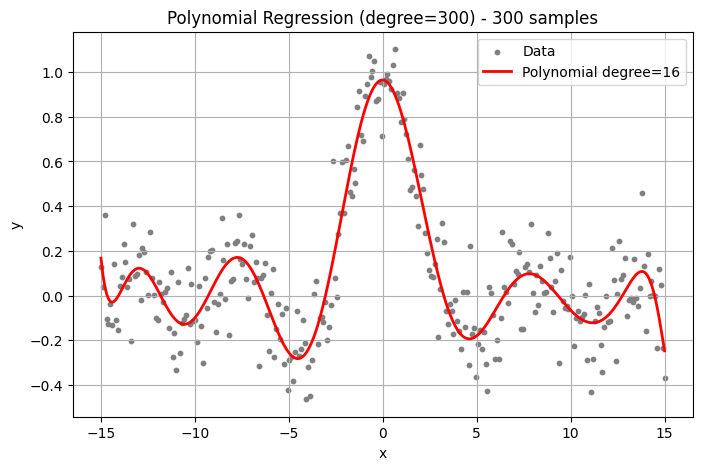

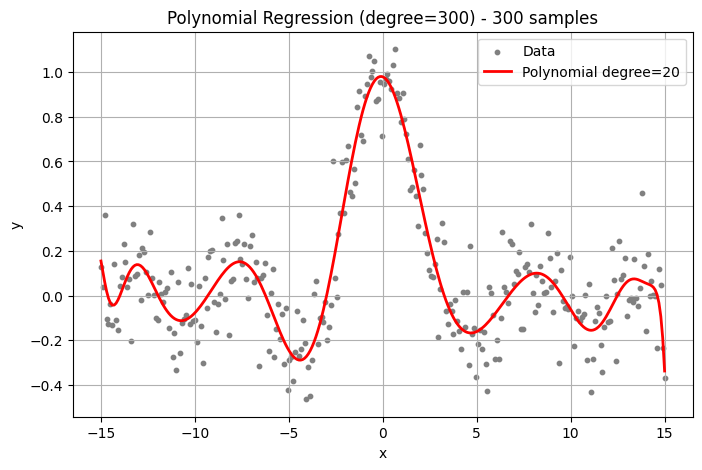

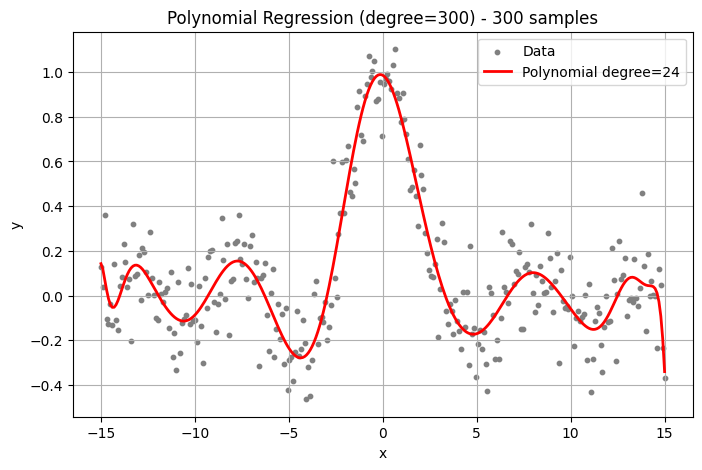

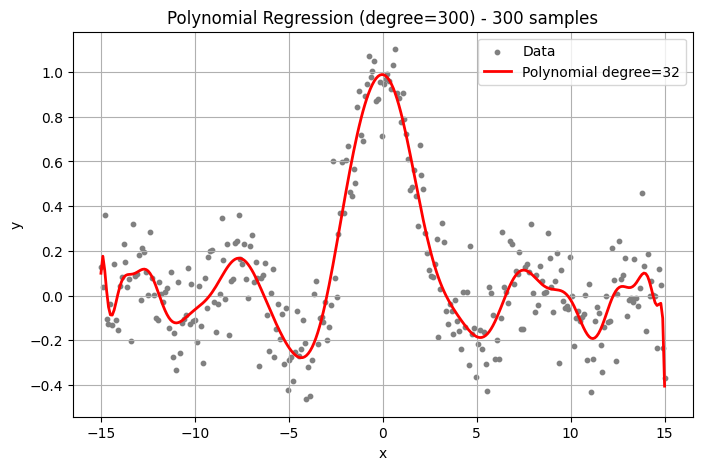

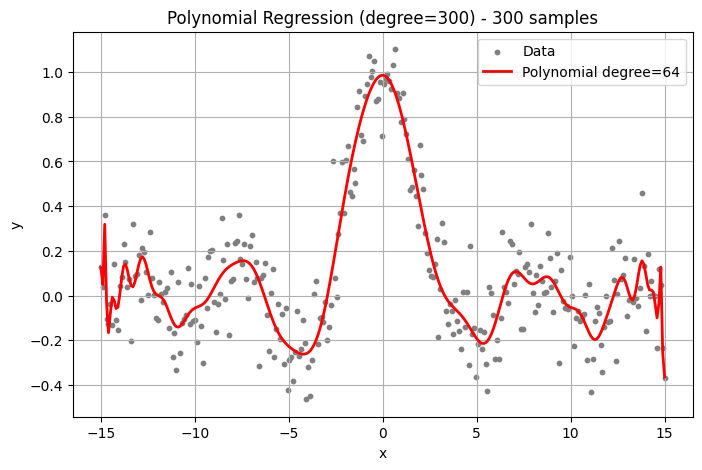

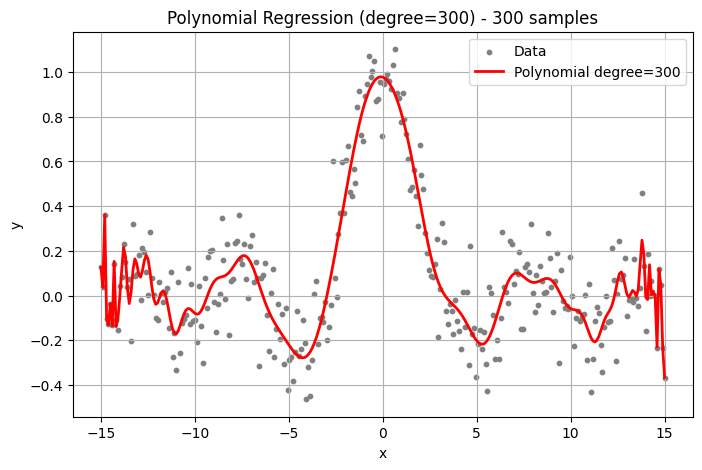

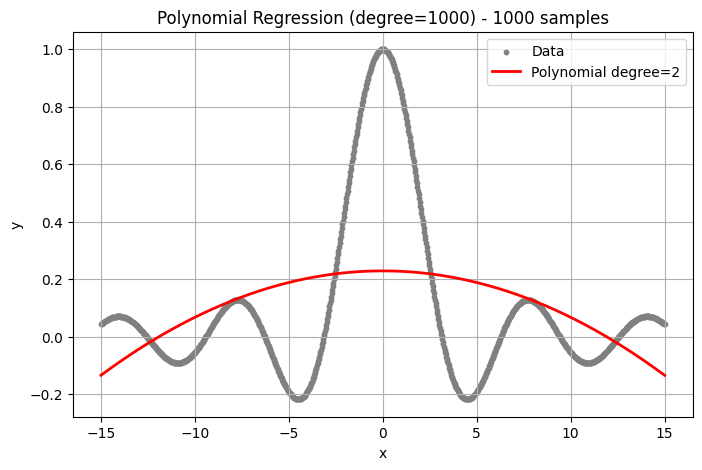

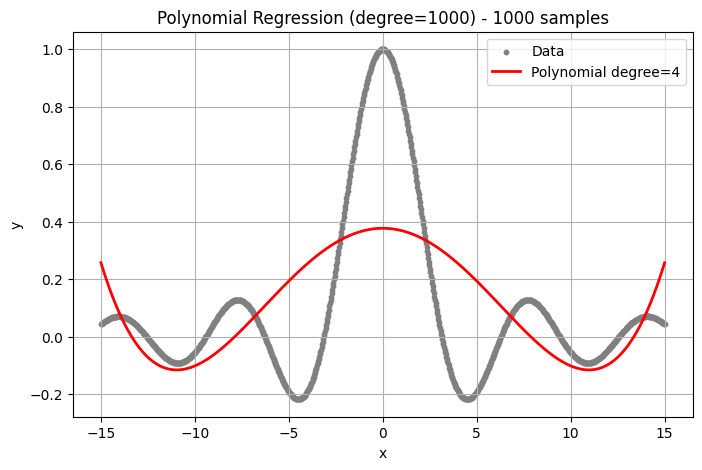

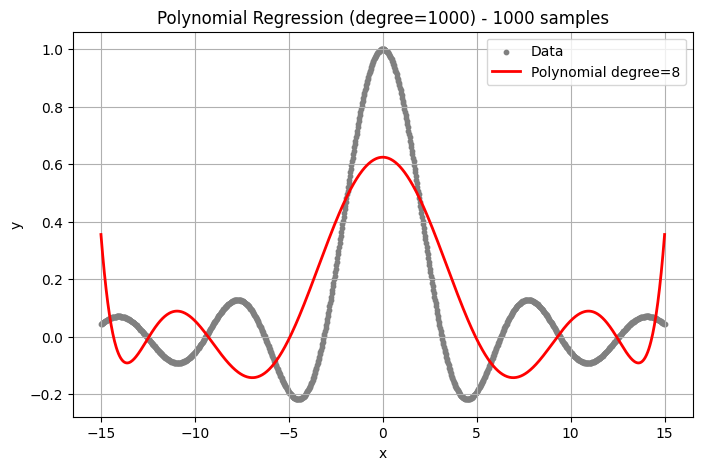

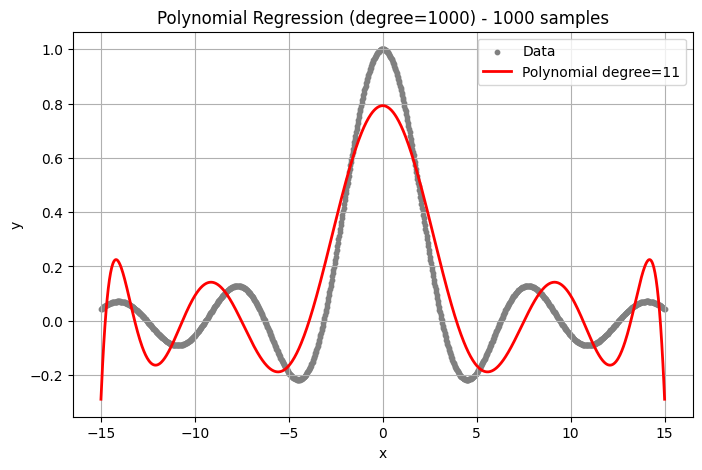

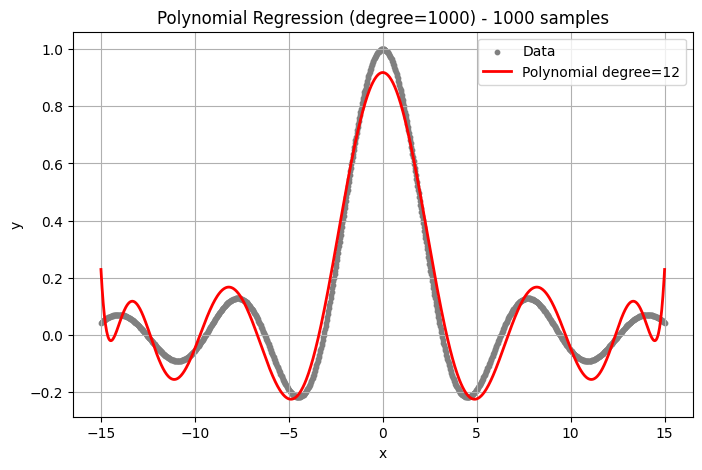

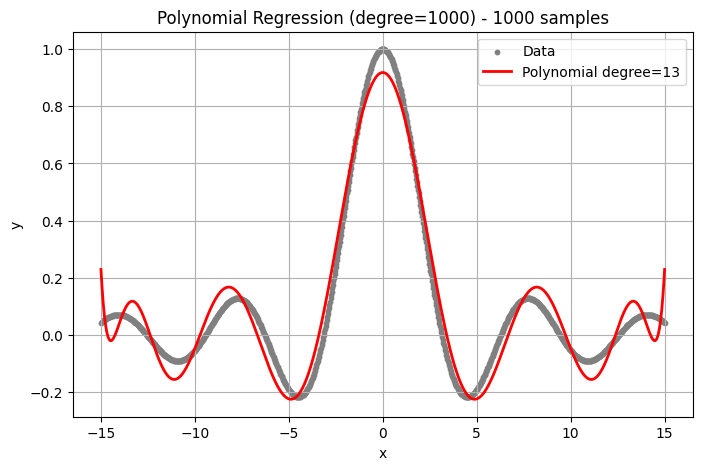

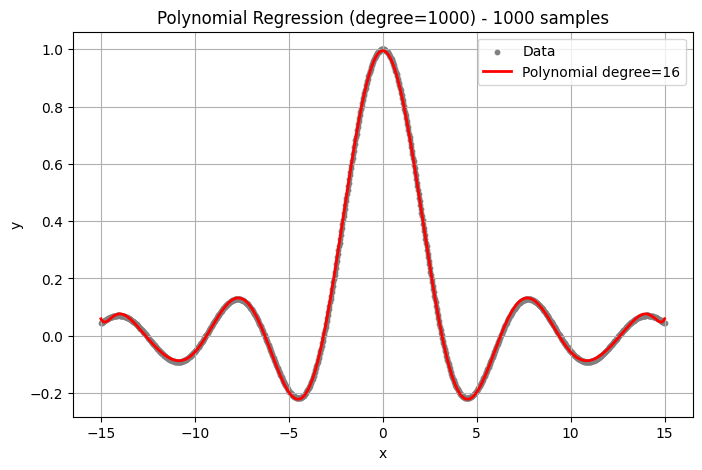

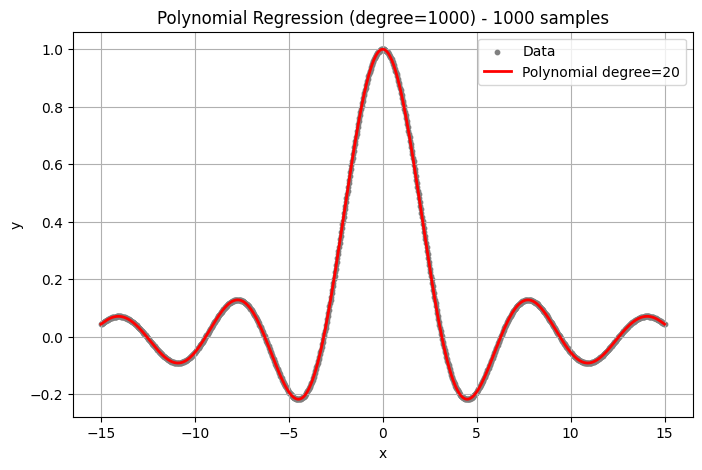

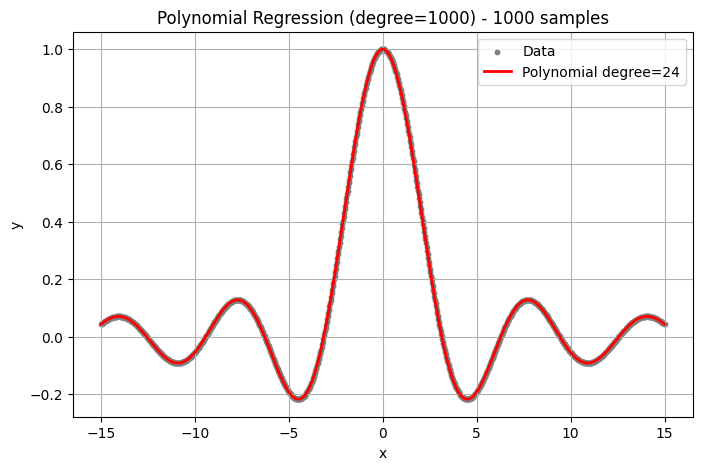

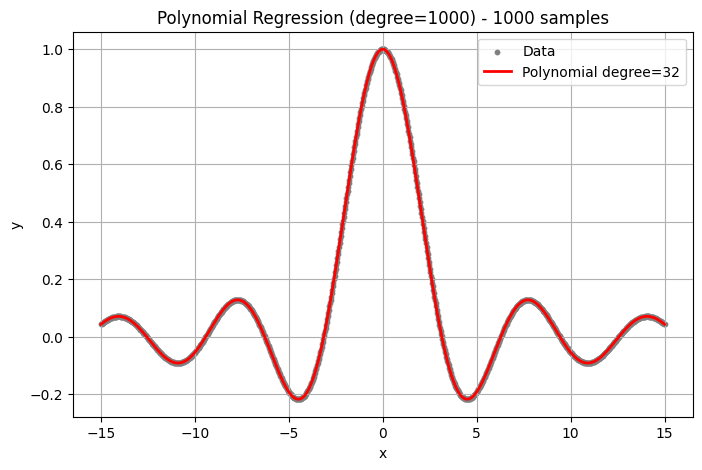

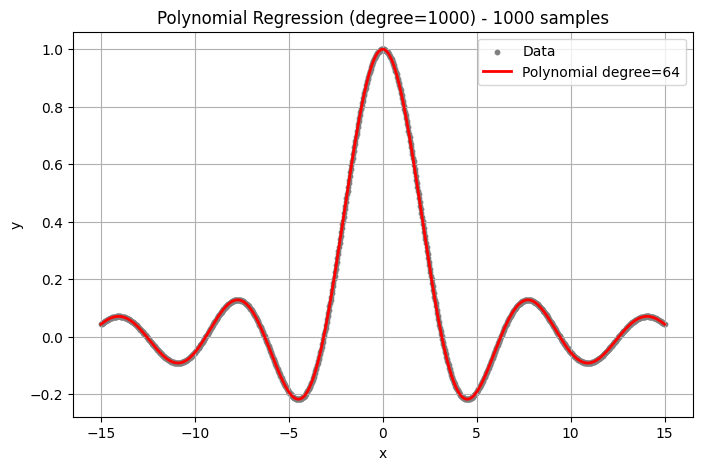

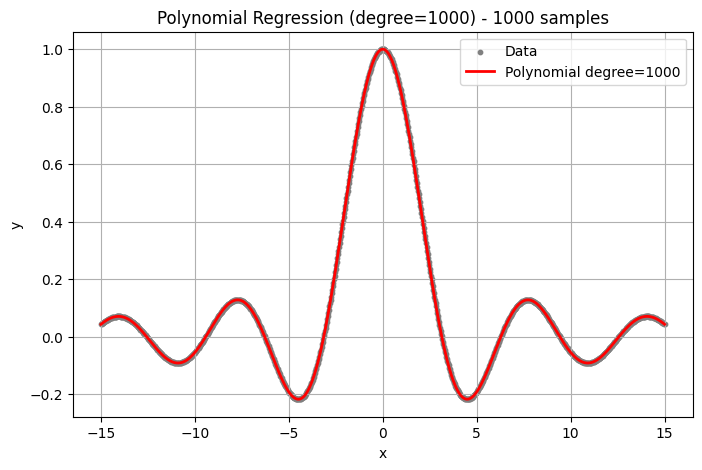

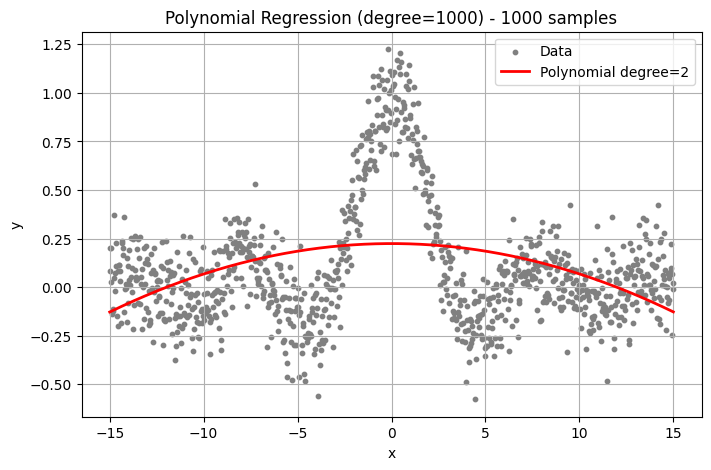

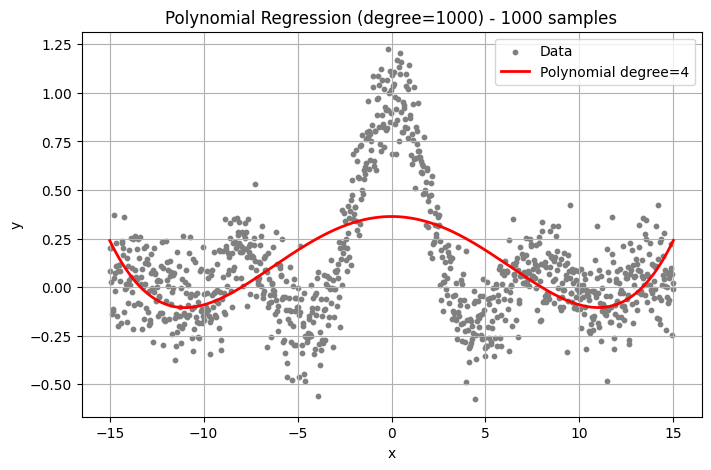

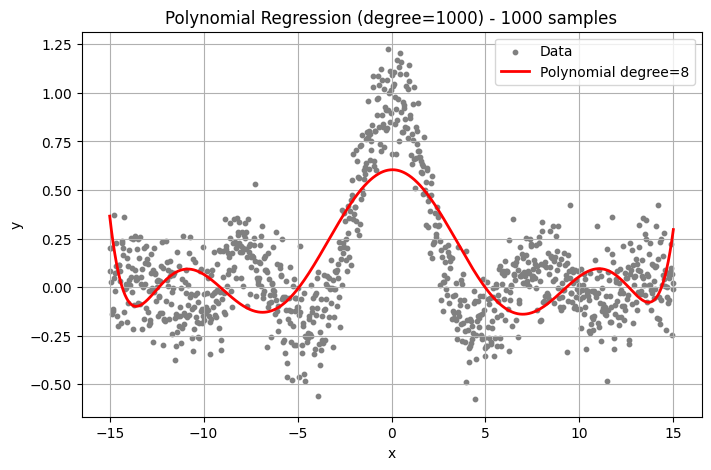

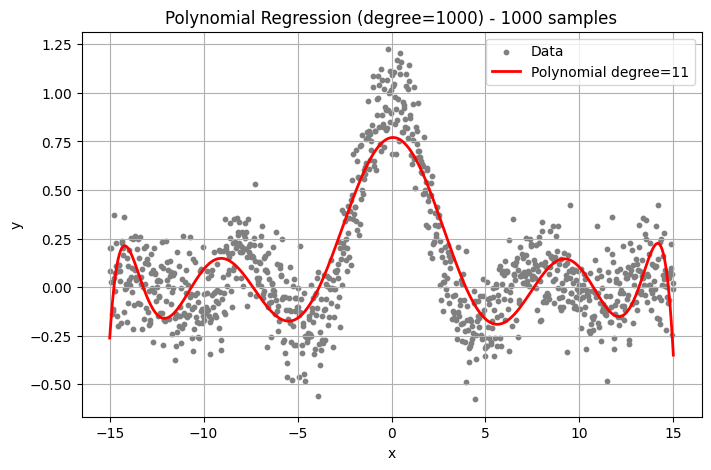

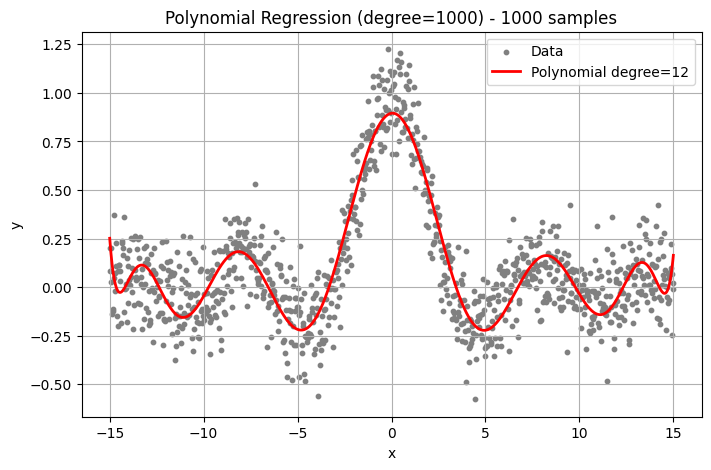

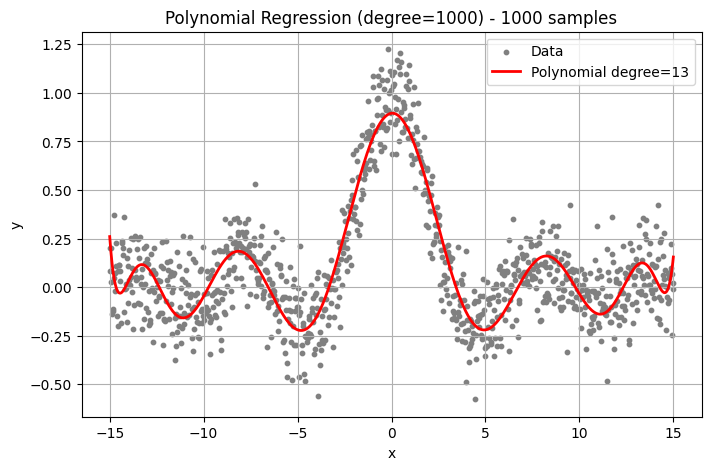

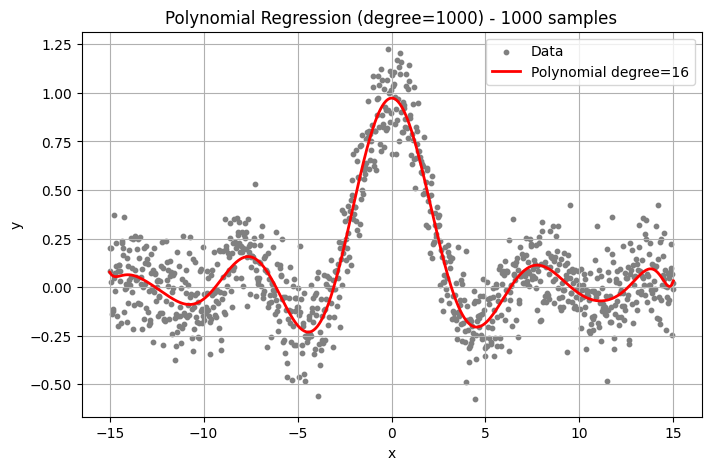

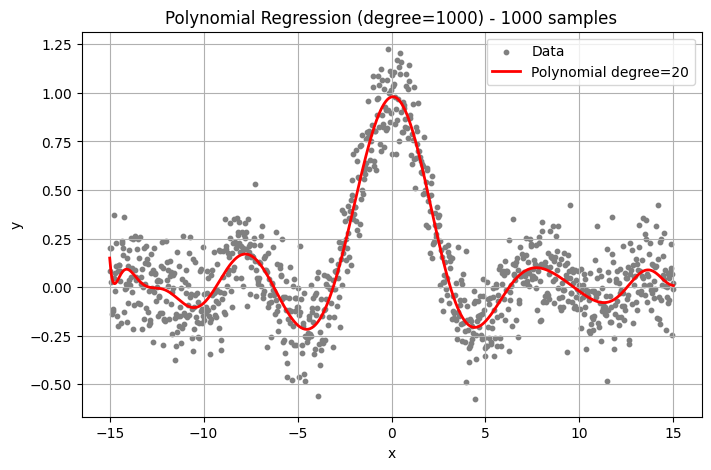

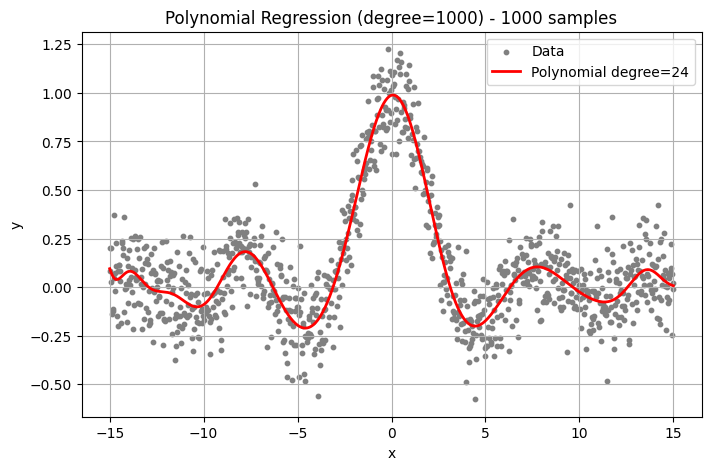

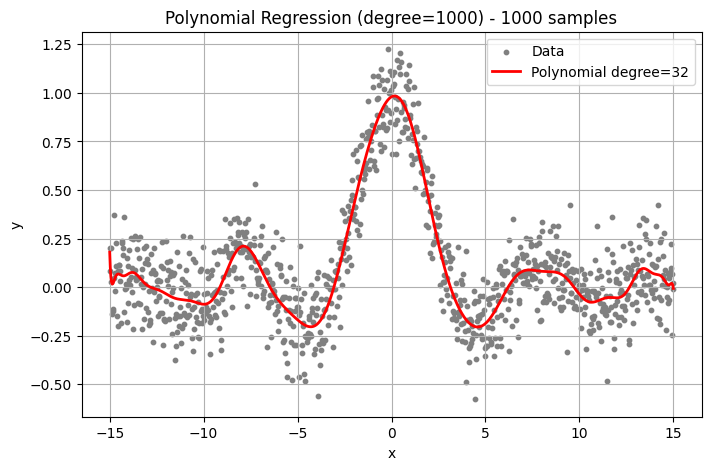

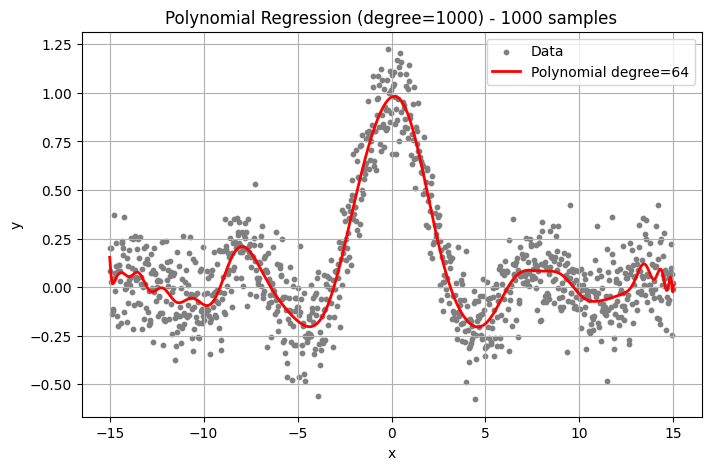

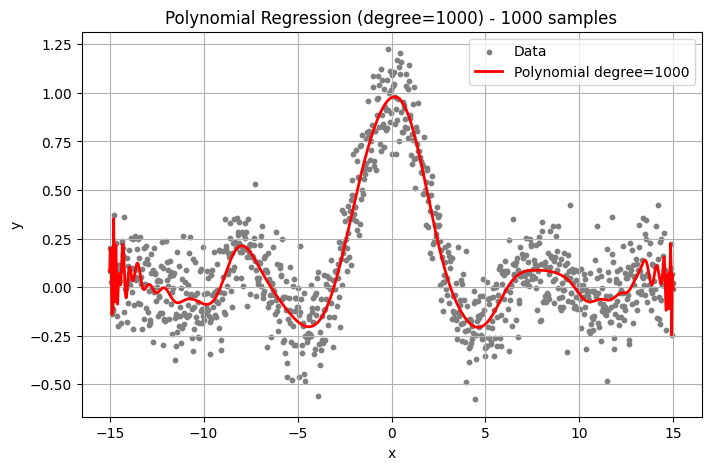

In [30]:
def polynomial_regression_fit(x, y, degree, title):
    x_scaled = x / np.max(np.abs(x))

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_scaled.reshape(-1, 1), y)
    y_pred = model.predict(x_scaled.reshape(-1, 1))
    
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, s=10, color='gray', label='Data')
    plt.plot(x, y_pred, color='red', linewidth=2, label=f'Polynomial degree={degree}')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔹 برای داده‌های noiseless با 100 نمونه، درجات مختلف
differentDegrees100 = [2, 4, 8, 11, 12,13, 16, 20, 24, 32, 64 ,100]
for deg in differentDegrees100:
    polynomial_regression_fit(x_100, y_100, deg, f'Polynomial Regression (degree={deg}) - 100 samples')

for deg in differentDegrees100:
    polynomial_regression_fit(x_100, y100noisy, deg, f'Polynomial Regression (degree={deg}) - 100 samples')

differentDegrees300 = [2, 4, 8, 11, 12,13, 16, 20, 24, 32, 64 ,300]
for deg in differentDegrees300:
    polynomial_regression_fit(x_300, y_300, deg, 'Polynomial Regression (degree=300) - 300 samples')

for deg in differentDegrees300:
    polynomial_regression_fit(x_300,y300noisy, deg, 'Polynomial Regression (degree=300) - 300 samples')

differentDegrees1000 = [2, 4, 8, 11, 12,13, 16, 20, 24, 32, 64 ,1000]
for deg in differentDegrees1000:
    polynomial_regression_fit(x_1000, y_1000, deg, 'Polynomial Regression (degree=1000) - 1000 samples')
    
for deg in differentDegrees1000:
    polynomial_regression_fit(x_1000, y1000noisy, deg, 'Polynomial Regression (degree=1000) - 1000 samples')